In [1]:
%pylab
%matplotlib inline
%reload_ext watermark

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
import librosa
import tensorflow as tf

%watermark -v -m -p scipy,numpy,sklearn,tensorflow

CPython 3.4.3
IPython 6.1.0

scipy 0.19.0
numpy 1.12.1
sklearn 0.18.1
tensorflow 0.9.0

compiler   : GCC 4.8.4
system     : Linux
release    : 4.2.0-27-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 1
interpreter: 64bit


In [3]:
sound_data = np.load('sa_tR.npz')
X_data = sound_data['X']
y_data = sound_data['y']
X_data.shape, y_data.shape

((616, 193), (616, 6))

In [4]:
from sklearn.model_selection import train_test_split
X_sub, X_test, y_sub, y_test = train_test_split(X_data, y_data, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_sub, y_sub, test_size=0.2)
len(X_train), len(X_val), len(X_test), len(y_train), len(y_val), len(y_test)

(393, 99, 124, 393, 99, 124)

In [5]:
X_train.shape, y_train.shape

((393, 193), (393, 6))

In [6]:
training_epochs = 5500
n_dim = 193
n_classes = 6
n_hidden_units_one = 300
n_hidden_units_two = 200
n_hidden_units_three = 100
learning_rate = 0.01
sd = 1 / np.sqrt(n_dim)

In [7]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim, n_hidden_units_one], mean=0, stddev=sd), name="w1")
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean=0, stddev=sd), name="b1")
h_1 = tf.nn.sigmoid(tf.matmul(X, W_1) + b_1)

W_2 = tf.Variable(tf.random_normal([n_hidden_units_one, n_hidden_units_two], mean=0, stddev=sd), name="w2")
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean=0, stddev=sd), name="b2")
h_2 = tf.nn.tanh(tf.matmul(h_1, W_2) + b_2)

W_3 = tf.Variable(tf.random_normal([n_hidden_units_two, n_hidden_units_three], mean=0, stddev=sd), name="w3")
b_3 = tf.Variable(tf.random_normal([n_hidden_units_three], mean=0, stddev=sd), name="b3")
h_3 = tf.nn.sigmoid(tf.matmul(h_2, W_3) + b_3)

W = tf.Variable(tf.random_normal([n_hidden_units_three, n_classes], mean=0, stddev=sd), name="w")
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd), name="b")
y_ = tf.nn.softmax(tf.matmul(h_3, W) + b)

init = tf.initialize_all_variables()

cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

In [8]:
cost_history = np.empty(shape=[1],dtype=float)
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        _,cost = sess.run([optimizer, cost_function], feed_dict={X: X_sub, Y: y_sub})
        cost_history = np.append(cost_history,cost)
        if(epoch % 1000 == 0):
            print(cost)
            
    
            
    print('Validation accuracy: ',round(sess.run(accuracy, feed_dict={X: X_test, Y: y_test}) , 3))
    saver.save(sess, "model.ckpt")

1.84437
0.153073
0.0409684
0.0209518
0.01361
0.00992528
Validation accuracy:  1.0


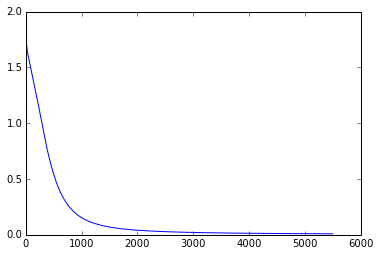

In [9]:
plt.plot(cost_history)

In [10]:
writer = tf.train.SummaryWriter('/mnt/hgfs/shared/tfk-notebooks-master/urban-sound-classification/Urban Sound Classification (2)', sess.graph)

AttributeError: module 'tensorflow.python.training.training' has no attribute 'SummaryWriter'